# 6.4 Supervised Machine Learning: Regression
Daniel Rodelli
_________

### Table of contents
1. Importing Libraries and Dataset
2. Data Cleaning
        2.1 Missing Values
        2.2 Duplicates
        2.3 Daataframe Cleanup
3. Hypothesis
4. Regression Model
        4.1 Data Preparation
        4.2 Regression Model

### 1. Importing Libraries and Dataset

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [99]:
%matplotlib inline

In [3]:
#setting the data path
path = r'C:\Users\daniel\Documents\CareerFoundry\Immersion_achievement6'

In [4]:
#importing the dataset
df = pd.read_csv(os.path.join(path,'data', 'prepared_data','df_checked_flags.csv'))

In [4]:
df.head()

,Unnamed: 0,State,Age_group,Gender,Date,N_cases,N_deaths,N_recoveries,Male,Female,...,N_cases/100k,N_cases/1M,N_deaths/100k,N_recoveries/100k,climate_flag,density,cases/density,deaths/density,recoveries/density,density_flag
0,0,Baden-Württemberg,A00-A04,F,2020-03-02,1,0,1,5516636,5586407,...,0.009007,0.090065,0.0,0.009007,oceanic,308,0.003247,0.0,0.003247,mid_density
1,1,Baden-Württemberg,A00-A04,F,2020-03-13,3,0,3,5516636,5586407,...,0.027020,0.270196,0.0,0.027020,oceanic,308,0.009740,0.0,0.009740,mid_density
2,2,Baden-Württemberg,A00-A04,F,2020-03-14,4,0,4,5516636,5586407,...,0.036026,0.360262,0.0,0.036026,oceanic,308,0.012987,0.0,0.012987,mid_density
3,3,Baden-Württemberg,A00-A04,F,2020-03-15,1,0,1,5516636,5586407,...,0.009007,0.090065,0.0,0.009007,oceanic,308,0.003247,0.0,0.003247,mid_density
4,4,Baden-Württemberg,A00-A04,F,2020-03-16,3,0,3,5516636,5586407,...,0.027020,0.270196,0.0,0.027020,oceanic,308,0.009740,0.0,0.009740,mid_density


In [5]:
df.shape

(102850, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102850 entries, 0 to 102849
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          102850 non-null  int64  
 1   State               102850 non-null  object 
 2   Age_group           102850 non-null  object 
 3   Gender              102850 non-null  object 
 4   Date                102850 non-null  object 
 5   N_cases             102850 non-null  int64  
 6   N_deaths            102850 non-null  int64  
 7   N_recoveries        102850 non-null  int64  
 8   Male                102850 non-null  int64  
 9   Female              102850 non-null  int64  
 10  Total               102850 non-null  int64  
 11  day                 102850 non-null  int64  
 12  month               102850 non-null  int64  
 13  year                102850 non-null  int64  
 14  weekday             102850 non-null  int64  
 15  geo_flag            102850 non-nul

## 2. Data Cleaning

#### 2.1 Missing Values

In [7]:
#check for missing values
df.isna().sum()

Unnamed: 0            0
State                 0
Age_group             0
Gender                0
Date                  0
N_cases               0
N_deaths              0
N_recoveries          0
Male                  0
Female                0
Total                 0
day                   0
month                 0
year                  0
weekday               0
geo_flag              0
N_cases/100k          0
N_cases/1M            0
N_deaths/100k         0
N_recoveries/100k     0
climate_flag          0
density               0
cases/density         0
deaths/density        0
recoveries/density    0
density_flag          0
dtype: int64

No missing values

#### 2.2 Duplicates

In [8]:
dups=df.duplicated()
dups.shape

(102850,)

No duplicates

#### 2.3 Dataframe cleanup

In [5]:
#clean the dataset by removing columns that are no more necessary, and recast types

#these columns are no more necessary, the necessary information is encoded in other columns
df.drop(columns=['Male','Female','Total','density','N_cases/1M', 'geo_flag'], inplace=True)
df.drop(columns=['N_recoveries', 'N_recoveries/100k', 'recoveries/density'])#not interested in recovery information
df['State']=df['State'].astype('category')
df['Gender']=df['Gender'].astype('category')
df['Age_group']=df['Age_group'].astype('category')
df['climate_flag']=df['climate_flag'].astype('category')
df['density_flag']=df['density_flag'].astype('category')
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102850 entries, 0 to 102849
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          102850 non-null  int64         
 1   State               102850 non-null  category      
 2   Age_group           102850 non-null  category      
 3   Gender              102850 non-null  category      
 4   Date                102850 non-null  datetime64[ns]
 5   N_cases             102850 non-null  int64         
 6   N_deaths            102850 non-null  int64         
 7   N_recoveries        102850 non-null  int64         
 8   day                 102850 non-null  int64         
 9   month               102850 non-null  int64         
 10  year                102850 non-null  int64         
 11  weekday             102850 non-null  int64         
 12  N_cases/100k        102850 non-null  float64       
 13  N_deaths/100k       102850 no

In [7]:
df.to_csv(os.path.join(path,'data','prepared_data','df_cleaned.csv'))

### 3 Hypothesis:
__The risk of contracting and dying covid is higher if a person is older than 80, male, and lives in a State with continental climate.__

The hypotesis involve the correlation between 3 independent variables:__Age, Gender, and location__; and one dependent variable, __Risk__.

For the sake of this project, I will create a dataframe containing only information relative to Age_group: 80+, Gender:M, climate:Continental.

### 4. Regression Model

#### 4.1 Data Preparation

In [11]:
df_reg=df.pivot_table(index=['Date','Age_group','Gender', 'climate_flag'], values=['N_cases/100k', 'N_deaths/100k'], aggfunc='sum')

In [12]:
df_reg=df_reg.reset_index()

In [13]:
df_reg

,Date,Age_group,Gender,climate_flag,N_cases/100k,N_deaths/100k
0,2020-01-01,A00-A04,F,continental,0.000000,0.0
1,2020-01-01,A00-A04,F,oceanic,0.000000,0.0
2,2020-01-01,A00-A04,M,continental,0.000000,0.0
3,2020-01-01,A00-A04,M,oceanic,0.000000,0.0
4,2020-01-01,A00-A04,unknown,continental,0.000000,0.0
...,...,...,...,...,...,...
27295,2021-10-12,unknown,F,oceanic,0.014585,0.0
27296,2021-10-12,unknown,M,continental,0.039509,0.0
27297,2021-10-12,unknown,M,oceanic,0.038985,0.0
27298,2021-10-12,unknown,unknown,continental,0.000000,0.0


In [14]:
#select only subgroups with the relevant information
df_reg=df_reg[df_reg['Age_group']=='A80+']
df_reg=df_reg[df_reg['climate_flag']=='continental']
df_reg=df_reg[df_reg['Gender']=='M']
df_reg.drop(columns=['Age_group', 'Gender', 'climate_flag'], inplace=True)

In [15]:
df_reg

,Date,N_cases/100k,N_deaths/100k
32,2020-01-01,0.015890,0.000000
74,2020-01-02,0.000000,0.000000
116,2020-01-03,0.000000,0.000000
158,2020-01-04,0.024649,0.024649
200,2020-01-05,0.000000,0.000000
...,...,...,...
27122,2021-10-08,0.978738,0.080759
27164,2021-10-09,0.596849,0.000000
27206,2021-10-10,0.255237,0.000000
27248,2021-10-11,0.697548,0.000000


<AxesSubplot:xlabel='N_cases/100k', ylabel='N_deaths/100k'>

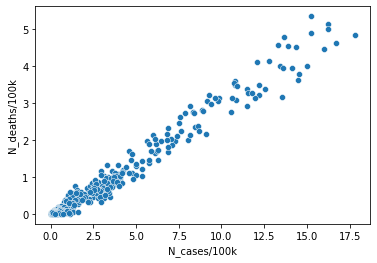

In [16]:
sns.scatterplot(data=df_reg, x='N_cases/100k', y='N_deaths/100k')

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X=df_reg['N_cases/100k'].values.reshape(-1,1)
y=df_reg['N_deaths/100k'].values.reshape(-1,1)

In [18]:
X

array([[1.58902833e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.46491137e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.46491137e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.46491137e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [7.61024409e-03],
       [2.46491137e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],


In [19]:
y

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.02464911],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02464911],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [20]:
#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
#set the regression object
regression=LinearRegression()

#### 4.2 Regression Analysis

In [22]:
#fit the regression object to the train set
regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

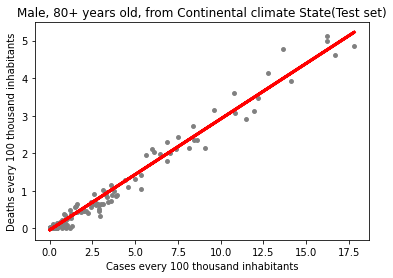

In [24]:
#plot the regression line
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Male, 80+ years old, from Continental climate State(Test set)')
plot_test.xlabel('Cases every 100 thousand inhabitants')
plot_test.ylabel('Deaths every 100 thousand inhabitants')
plot_test.show()

In [25]:
#summary statistics
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29528019]]
Mean squared error:  0.02577590998150057
R2 score:  0.9786884673298109


In [26]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head()

,Actual,Predicted
0,0.000000,-0.035944
1,3.138374,3.486117
2,0.898018,1.125958
3,0.062340,0.152236
4,0.400999,0.614196


In [27]:
# compare how the model fits the training set
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29528019]]
Mean squared error:  0.026283686239923
R2 score:  0.9724856150786986


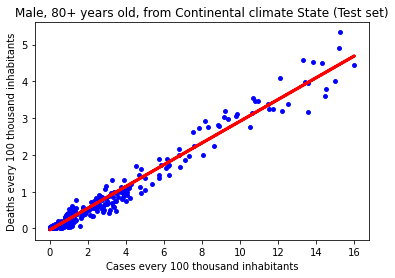

In [28]:
#plot a regression line for the training set
plot_test = plt
plot_test.scatter(X_train, y_train, color='b', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Male, 80+ years old, from Continental climate State (Test set)')
plot_test.xlabel('Cases every 100 thousand inhabitants')
plot_test.ylabel('Deaths every 100 thousand inhabitants')
plot_test.show()

In [29]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head()

,Actual,Predicted
0,0.000000,0.000071
1,1.157446,0.834566
2,0.486382,0.348013
3,0.805916,1.077107
4,0.000000,-0.023193


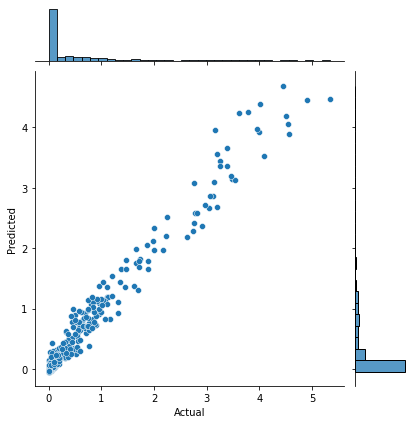

In [30]:
#plot the predicted values versus the actual values
sns.jointplot(data=data, x='Actual', y='Predicted')

The model has an R2 of 0.97 and a MSE of 0.026, indicating that the accuracy of the model is very high.
The model could be further improved if the distribution of the data were more uniform, since the data is quite dense towards low values and quite sparse towards high values. I could be technically called a data collection bias, but since we are dealing with data coming from people infected by COVID-19 virus, I don't see a practical (or ethical) way to increase the density of data in the upper values, short of letting more people being infected.
-----------------------------

I want to see the difference between the actual and predicted values. If the model is unbiased, the distribution of the differences should be normal.

In [41]:
data['diff']=(data['Actual']-data['Predicted'])

In [42]:
data

,Actual,Predicted,diff
0,0.000000,0.000071,-0.000071
1,1.157446,0.834566,0.322880
2,0.486382,0.348013,0.138369
3,0.805916,1.077107,-0.271191
4,0.000000,-0.023193,0.023193
...,...,...,...
450,0.000000,-0.040438,0.040438
451,3.201654,2.689089,0.512565
452,0.000000,-0.040438,0.040438
453,0.139687,0.227800,-0.088113


<AxesSubplot:xlabel='diff', ylabel='Density'>

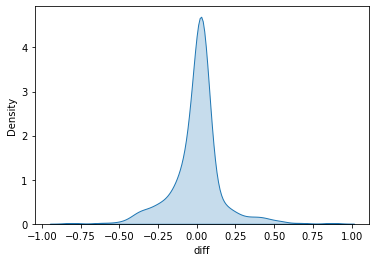

In [78]:
sns.kdeplot(data['diff'], fill=True)

The distribution of the differences appears to be slightly asimmetric (right-skewed). This suggests that the model is somewhat overestimating the parameters (actual value smaller than predicted).

In [89]:
#check the skewness of the distribution
from scipy.stats import skew

skew(data['diff'])

0.08506146944841986

The skewness value confirms that the distribution is slightly skewed.